# K-Nearest Neighbors Alghoritm

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, mean_squared_error


In [ ]:
dataset = pd.read_csv("phising_website_dataset.csv")
x = dataset.drop(["Result"], axis=1)
y = dataset["Result"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3, random_state=42)

In [ ]:
dataset.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWindow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,Phishing
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,Phishing
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,Phishing
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,Phishing
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,Legitimate


In [ ]:
#model KNN
neig = np.arange(1,41)
train_accuracy = []
test_accuracy = []
cross_score = []
kf = KFold(n_splits=5, shuffle=True, random_state = 42)
#kf.get_n_splits(x)

for k in neig:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    #train accuracy
    score = cross_val_score(knn, x_train, y_train, cv=kf)
    cross_score.append(score.mean())
    train_accuracy.append(knn.score(x_train, y_train))
    test_accuracy.append(knn.score(x_test, y_test))


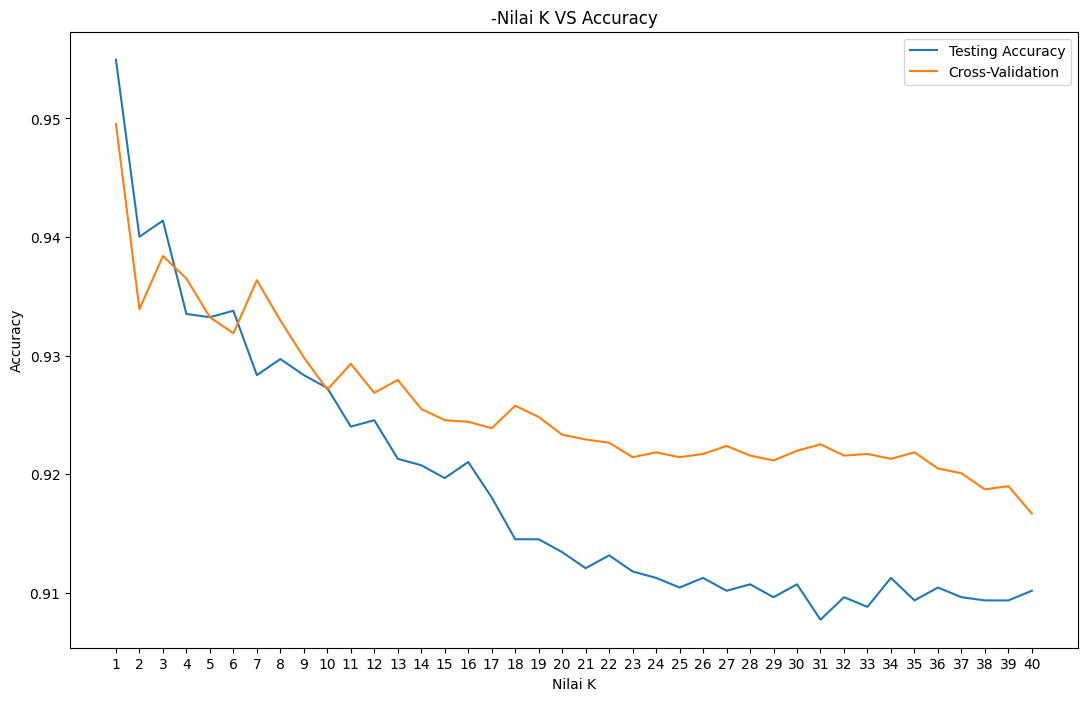

Best accuracy is 0.9549525101763908 with K = 1


In [ ]:
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
#plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.plot(neig, cross_score, label='Cross-Validation')
plt.legend()
plt.title('-Nilai K VS Accuracy')
plt.xlabel('Nilai K')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

In [ ]:
mse = [1-x for x in cross_score]
optimal_k = neig[mse.index(min(mse))]
print("Optimal K: ", optimal_k)

Optimal K:  1


In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(x_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Legitimate,Phishing,All
True,,,
Legitimate,1951,151,2102
Phishing,180,1403,1583
All,2131,1554,3685


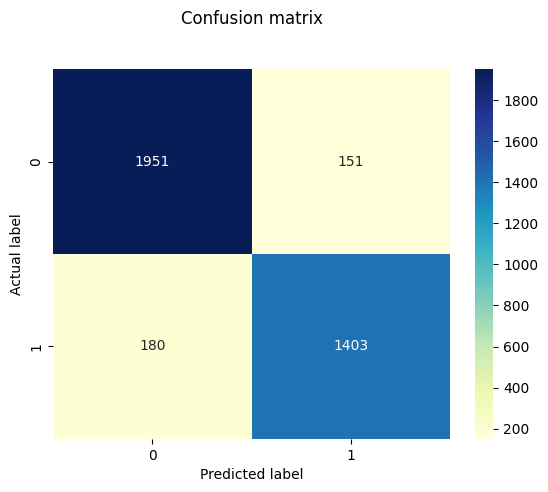

In [ ]:
from sklearn import metrics
cnf_matrix_knn = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix_knn), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

  Legitimate       0.92      0.93      0.92      2102
    Phishing       0.90      0.89      0.89      1583

    accuracy                           0.91      3685
   macro avg       0.91      0.91      0.91      3685
weighted avg       0.91      0.91      0.91      3685



# KNN + GA Feature Selection

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from random import randint

def split(df,label):
    X_tr, X_te, Y_tr, Y_te = train_test_split(df, label, test_size=1/3, random_state=42)
    return X_tr, X_te, Y_tr, Y_te

def initilization_of_population(size, n_feat):
  population = []
  for i in range(size):
    chromosome = np.ones(n_feat, dtype=np.bool)
    chromosome[:int(0.3*n_feat)] = False
    np.random.shuffle(chromosome)
    population.append(chromosome)
  return population

def fitness_score(population):
  scores = []
  for chromosome in population:
    logmodel.fit(X_train.iloc[:,chromosome], Y_train)
    predictions = logmodel.predict(X_test.iloc[:,chromosome])
    scores.append(accuracy_score(Y_test, predictions))
  scores, population = np.array(scores), np.array(population)
  inds = np.argsort(scores)
  return list(scores[inds][::-1]), list(population[inds,:][::-1])

def selection(pop_after_fit, n_parents):
  population_nextgen = []
  for i in range(n_parents):
    population_nextgen.append(pop_after_fit[i])
  return population_nextgen

def crossover(pop_after_sel):
  pop_nextgen = pop_after_sel
  for i in range(0, len(pop_after_sel),2):
    new_par = []
    child_1,child_2 = pop_nextgen[i], pop_nextgen[i+1]
    new_par = np.concatenate((child_1[:len(child_1)//2], child_2[len(child_1)//2:]))
    pop_nextgen.append(new_par)
  return pop_nextgen

def mutation(pop_after_cross,mutation_rate,n_feat):
    mutation_range = int(mutation_rate*n_feat)
    pop_next_gen = []
    for n in range(0,len(pop_after_cross)):
        chromo = pop_after_cross[n]
        rand_posi = []
        for i in range(0,mutation_range):
            pos = randint(0,n_feat-1)
            rand_posi.append(pos)
        for j in rand_posi:
            chromo[j] = not chromo[j]
        pop_next_gen.append(chromo)
    return pop_next_gen

def generations(df,label,size,n_feat,n_parents,mutation_rate,n_gen,X_train,
                                   X_test, Y_train, Y_test):
    best_chromo= []
    best_score= []
    population_nextgen=initilization_of_population(size,n_feat)
    for i in range(n_gen):
        scores, pop_after_fit = fitness_score(population_nextgen)
        print('Best score in generation',i+1,':',scores[:1])  #2
        pop_after_sel = selection(pop_after_fit,n_parents)
        pop_after_cross = crossover(pop_after_sel)
        population_nextgen = mutation(pop_after_cross,mutation_rate,n_feat)
        best_chromo.append(pop_after_fit[0])
        best_score.append(scores[0])

    return best_chromo,best_score
    #return max(best_score)


# KNN + GA Feature Selection test

In [ ]:
#!pip install sklearn_genetic
!pip install sklearn-genetic-opt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 KB 11.6 MB/s eta 0:00:00


In [ ]:
from sklearn_genetic import GAFeatureSelectionCV

estimators = KNeighborsClassifier(n_neighbors=3)
models = GAFeatureSelectionCV(estimators, cv=kf,
                              verbose=0, scoring='accuracy', max_features=21,
                              population_size=30, crossover_probability=0.5, mutation_probability=0.03,
                              generations = 30, tournament_size = 3, n_jobs=-1)

history = models.fit(x,y)
print('Feature Selection:', x.columns[history.support_])

Feature Selection: Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'double_slash_redirecting', 'Prefix_Suffix', 'having_Sub_Domain',
       'SSLfinal_State', 'Favicon', 'port', 'HTTPS_token', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'RightClick', 'popUpWindow', 'Iframe', 'web_traffic',
       'Links_pointing_to_page'],
      dtype='object')


In [ ]:
x_ga = dataset.drop(["Result", "having_At_Symbol", "Domain_registeration_length", "Request_URL", "Redirect", "on_mouseover",
                     "age_of_domain", "DNSRecord", "Page_Rank", "Google_Index", "Statistical_report"], axis=1)
y_ga = dataset["Result"]

In [ ]:
x_ga.head()

,having_IP_Address,URL_Length,Shortining_Service,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Favicon,port,HTTPS_token,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,RightClick,popUpWindow,Iframe,web_traffic,Links_pointing_to_page
0,-1,1,1,-1,-1,-1,-1,1,1,-1,-1,1,-1,-1,-1,1,1,1,-1,1
1,1,1,1,1,-1,0,1,1,1,-1,0,-1,-1,1,1,1,1,1,0,1
2,1,0,1,1,-1,-1,-1,1,1,-1,0,-1,-1,-1,-1,1,1,1,1,0
3,1,0,1,1,-1,-1,-1,1,1,-1,0,0,-1,1,1,1,1,1,1,-1
4,1,0,-1,1,-1,1,1,1,1,1,0,0,-1,1,1,1,-1,1,0,1


In [ ]:
x_ga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   having_IP_Address         11055 non-null  int64
 1   URL_Length                11055 non-null  int64
 2   Shortining_Service        11055 non-null  int64
 3   double_slash_redirecting  11055 non-null  int64
 4   Prefix_Suffix             11055 non-null  int64
 5   having_Sub_Domain         11055 non-null  int64
 6   SSLfinal_State            11055 non-null  int64
 7   Favicon                   11055 non-null  int64
 8   port                      11055 non-null  int64
 9   HTTPS_token               11055 non-null  int64
 10  URL_of_Anchor             11055 non-null  int64
 11  Links_in_tags             11055 non-null  int64
 12  SFH                       11055 non-null  int64
 13  Submitting_to_email       11055 non-null  int64
 14  Abnormal_URL              11055 non-nu

In [ ]:
x_train_ga, x_test_ga, y_train_ga, y_test_ga = train_test_split(x_ga, y_ga, test_size=1/3, random_state=42)

In [ ]:
#model KNN
neig = np.arange(1,41)
train_accuracy_ga = []
test_accuracy_ga = []
cross_score_ga = []
kf = KFold(n_splits=5, shuffle=True, random_state = 42)
#kf.get_n_splits(x)

for k in neig:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_ga,y_train_ga)
    #train accuracy
    score = cross_val_score(knn, x_train_ga, y_train_ga, cv=kf)
    cross_score_ga.append(score.mean())
    train_accuracy_ga.append(knn.score(x_train_ga, y_train_ga))
    test_accuracy_ga.append(knn.score(x_test_ga, y_test_ga))

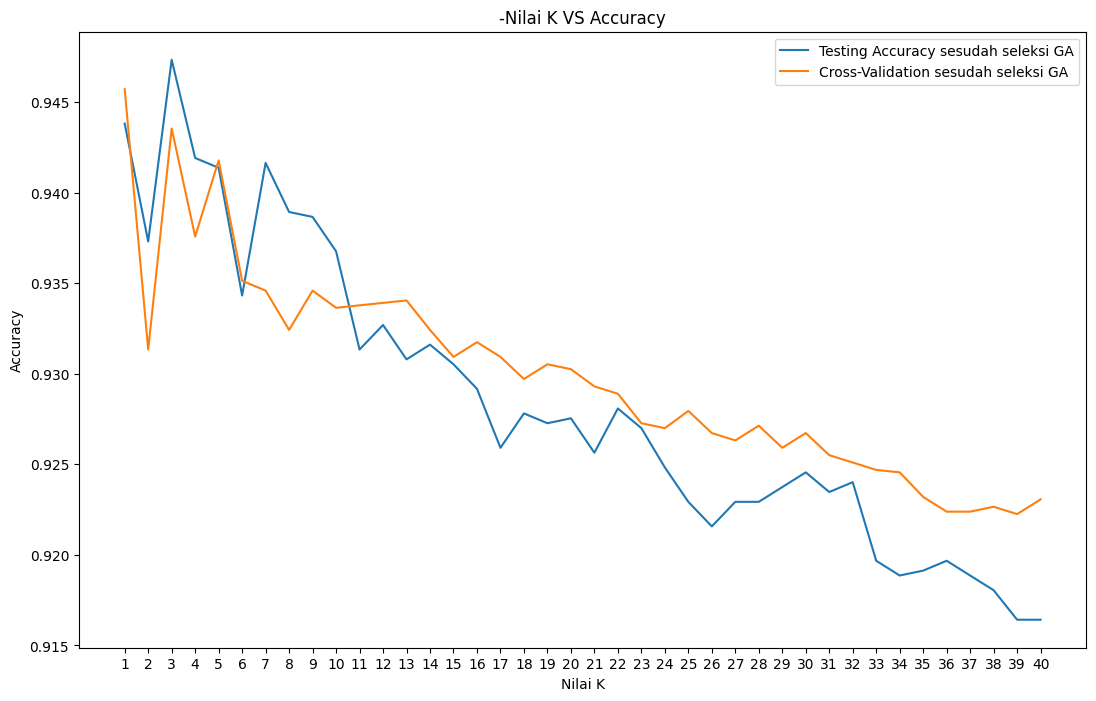

In [ ]:
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy_ga, label = 'Testing Accuracy sesudah seleksi GA')
#plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.plot(neig, cross_score_ga, label='Cross-Validation sesudah seleksi GA')
#plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
#plt.plot(neig, train_accuracy, label = 'Training Accuracy')
#plt.plot(neig, cross_score, label='Cross-Validation')
plt.legend()
plt.title('-Nilai K VS Accuracy')
plt.xlabel('Nilai K')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph ga.png')
plt.show()
#print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred_ga = knn.predict(x_test_ga)
confusion_matrix(y_test_ga,y_pred_ga)
pd.crosstab(y_test_ga, y_pred_ga, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Legitimate,Phishing,All
True,,,
Legitimate,1944,158,2102
Phishing,150,1433,1583
All,2094,1591,3685


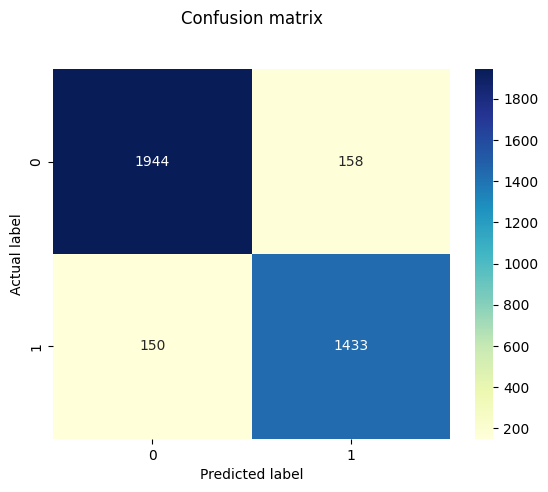

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test_ga, y_pred_ga)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_ga,y_pred_ga))

              precision    recall  f1-score   support

  Legitimate       0.93      0.92      0.93      2102
    Phishing       0.90      0.91      0.90      1583

    accuracy                           0.92      3685
   macro avg       0.91      0.92      0.91      3685
weighted avg       0.92      0.92      0.92      3685



# UJI T-Test

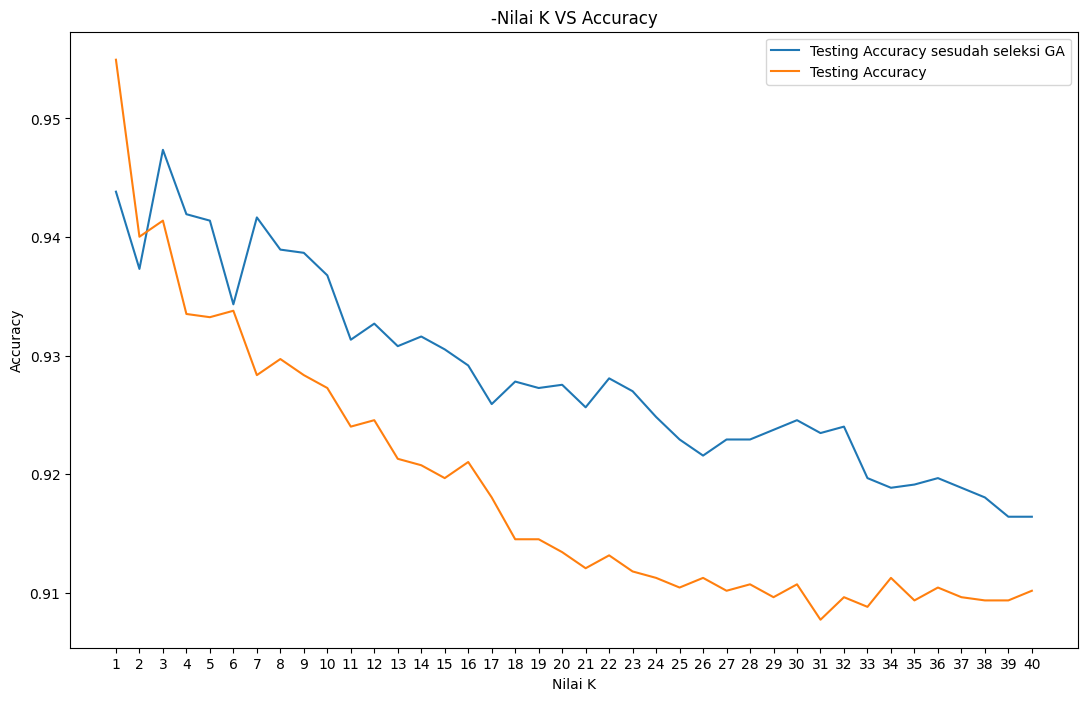

In [ ]:
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy_ga, label = 'Testing Accuracy sesudah seleksi GA')
#plt.plot(neig, train_accuracy, label = 'Training Accuracy')
#plt.plot(neig, cross_score_ga, label='Akurasi Cross-Validation sesudah seleksi GA')
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
#plt.plot(neig, train_accuracy, label = 'Training Accuracy')
#plt.plot(neig, cross_score, label='Akurasi Cross-Validation sebelum seleksi GA')
plt.legend()
plt.title('-Nilai K VS Accuracy')
plt.xlabel('Nilai K')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph ga vs non ga.png')
plt.show()
#print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

In [ ]:
import scipy.stats as stats

alpha = 0.05
statistic, pvalue = stats.ttest_ind(a=test_accuracy, b=test_accuracy_ga, equal_var=True)
print('nilai p value ', pvalue)

if pvalue < alpha:
  print("Akurasi signifikan")
else:
  print('tidak signifikan')

nilai p value  3.44913051354397e-05
Akurasi signifikan


# Visualisasi